In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('churn_input_dataset_final.csv')
df.head()

,id,score_date,arr_diff_outcome,eligibility_90_days,type,max_tickets_per_agent,new_tickets,num_actions_ratio,num_comments_ratio,new_tickets_ratio,...,is_reply_time_above_benchmark,z2_num_slas_breached,is_resolution_time_above_benchmark,agent_productivity,self_service_ratio,is_end_user_csat_response_rate_above_benchmark,is_end_user_csat_above_benchmark,is_csat_above_benchmark,ticket_deflection_rate,crm_is_agent_monts
0,LnQhHe,2022-03-11,0.0,1,hold,0,0,1.0,1.0,1.0,...,0,0,0,NaN,NaN,0,0,0,0.00,0
1,2AAqh7,2022-10-28,0.0,1,hold,1,4,0.2,2.0,1.7,...,0,0,0,1.0,3.8,0,0,0,0.00,0
2,lFWAqt,2022-09-09,0.0,1,hold,0,0,1.0,1.0,1.0,...,0,0,0,NaN,NaN,0,0,0,0.00,0
3,Odvxrz,2023-03-03,0.0,1,hold,0,0,1.0,1.0,1.0,...,0,0,0,NaN,NaN,0,0,0,0.00,0
4,zV2zOX,2022-11-18,0.0,1,hold,344,588,1.1,1.1,1.0,...,0,0,0,24.6,12.2,0,1,1,40.48,0


In [7]:
df.shape

(70000, 76)

In [8]:
df.isnull().sum()

id                                                0
score_date                                        0
arr_diff_outcome                                  0
eligibility_90_days                               0
type                                              0
                                                 ..
is_end_user_csat_response_rate_above_benchmark    0
is_end_user_csat_above_benchmark                  0
is_csat_above_benchmark                           0
ticket_deflection_rate                            0
crm_is_agent_monts                                0
Length: 76, dtype: int64

In [9]:
df.columns

Index(['id', 'score_date', 'arr_diff_outcome', 'eligibility_90_days', 'type',
       'max_tickets_per_agent', 'new_tickets', 'num_actions_ratio',
       'num_comments_ratio', 'new_tickets_ratio', 'solved_tickets_ratio',
       'max_agents', 'legacy_flag', 'paid_chat', 'team_plus',
       'max_agents_ratio', 'months_since_last_downsell', 'suite_flag',
       'paid_talk', 'total_arr_ratio', 'num_automations_ratio',
       'recent_kb_articles', 'num_views_ratio', 'num_user_fields',
       'num_ticket_forms', 'app_installs_ratio', 'num_orgs_ratio',
       'num_total_tags_ratio', 'no_hc_last_6M', 'num_macros', 'csat_enabled',
       'new_total_searches', 'num_app_installs', 'num_triggers_ratio',
       'num_automations', 'total_hc_views', 'custom_ticket_fields_ratio',
       'num_total_tags', 'num_views', 'num_ticket_forms_ratio', 'new_kb_views',
       'num_macros_ratio', 'new_kb_views_ratio', 'targets_engaged',
       'ticket_forms_engaged', 'automations_engaged',
       'num_custom_ticke

In [10]:
df.groupby(['score_date'])['new_tickets'].value_counts()

score_date  new_tickets
2022-02-04  0              287
            1               33
            3               22
            2               18
            6               13
                          ... 
2023-04-28  159              1
            145              1
            149              1
            157              1
            53325            1
Name: count, Length: 32136, dtype: int64

In [11]:
df.describe()

,arr_diff_outcome,eligibility_90_days,max_tickets_per_agent,new_tickets,num_actions_ratio,num_comments_ratio,new_tickets_ratio,solved_tickets_ratio,max_agents,legacy_flag,...,is_reply_time_above_benchmark,z2_num_slas_breached,is_resolution_time_above_benchmark,agent_productivity,self_service_ratio,is_end_user_csat_response_rate_above_benchmark,is_end_user_csat_above_benchmark,is_csat_above_benchmark,ticket_deflection_rate,crm_is_agent_monts
count,7.000000e+04,70000.0,7.000000e+04,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,46857.000000,52031.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,-4.284523e+02,1.0,5.221148e+02,1.273733e+03,6.287121,3.282704,2.675429,5.439470,8.874643,0.167443,...,0.007343,0.027871,0.010957,261.551015,63.455286,0.032229,0.104071,0.130271,1.547181,0.000871
std,1.526502e+04,0.0,1.348899e+04,1.281460e+04,355.597098,158.089893,117.633070,363.252547,294.502862,0.373373,...,0.085376,0.222218,0.104102,2162.597312,3640.497866,0.176608,0.305355,0.336604,9.732044,0.029507
min,-2.081560e+06,1.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.900000,0.900000,0.900000,0.900000,1.000000,0.000000,...,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,1.0,2.300000e+01,5.800000e+01,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,53.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000e+00,1.0,2.150000e+02,4.550000e+02,1.200000,1.200000,1.200000,1.200000,6.000000,0.000000,...,0.000000,0.000000,0.000000,193.300000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.990846e+05,1.0,3.318699e+06,2.627466e+06,69418.000000,31400.000000,28061.000000,88528.000000,61870.000000,1.000000,...,1.000000,6.000000,1.000000,331313.000000,691513.500000,1.000000,1.000000,1.000000,200.000000,1.000000


In [12]:
def new_func():
    return df['type']

new_func().value_counts()

type
hold           54364
expansion       6394
churn           5788
contraction     3454
Name: count, dtype: int64

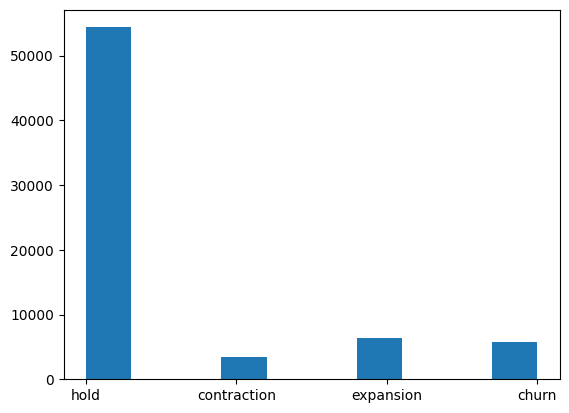

In [13]:
plt.hist(df['type'])
plt.show()

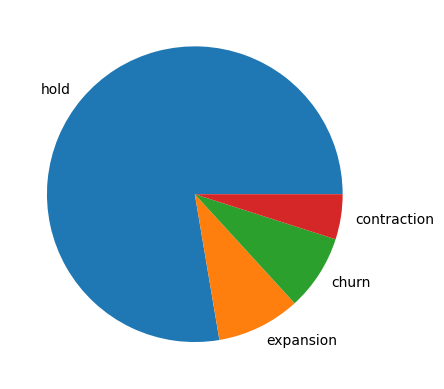

In [14]:
plt.pie(df['type'].value_counts(),labels=['hold','expansion','churn','contraction'])
# plt.legend()
plt.show()

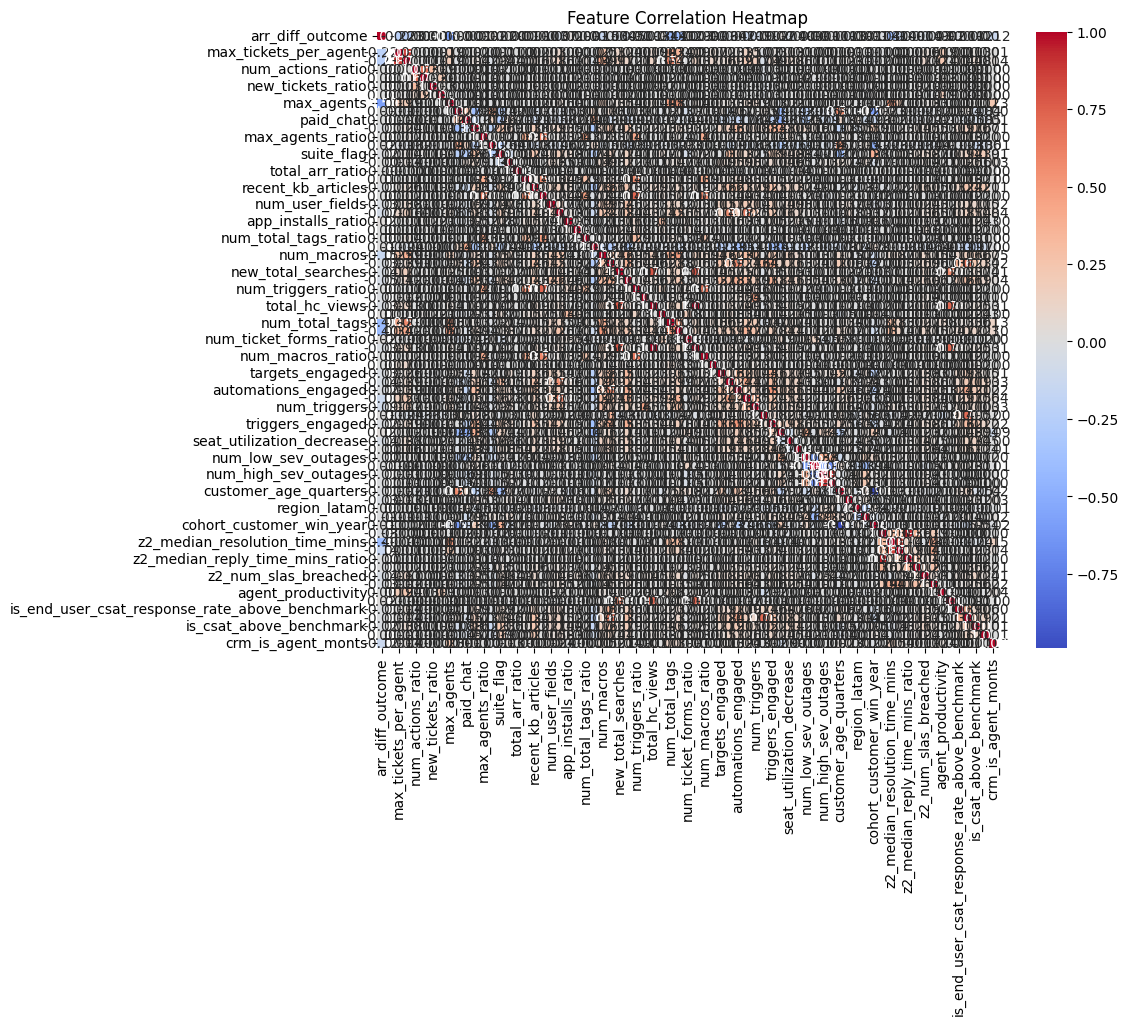

In [15]:
numeric_columns = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
for i in df.columns:
    print(df[i].dtype)

object
object
float64
int64
object
int64
int64
float64
float64
float64
float64
int64
int64
int64
int64
float64
float64
int64
int64
float64
float64
int64
float64
int64
int64
float64
float64
float64
int64
int64
int64
int64
int64
float64
int64
int64
float64
int64
int64
float64
int64
float64
float64
int64
int64
int64
int64
int64
float64
int64
float64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
int64
int64
int64
float64
float64
int64
int64
int64
float64
int64


In [17]:
# Categorical data
for i in df.columns.tolist():
    if (df[i].dtype == 'object'):
        print(i)

id
score_date
type


In [18]:
desc = pd.DataFrame({'Column Names':df.columns}).set_index('Column Names')
desc['Rows'] = df.shape[0]
desc['Missing Values'] = df.isnull().sum()
desc['Data Types'] = df.dtypes
desc['Duplicate Row'] = len(df)-len(df.drop_duplicates())
desc['Mean'] = [df[i].sum()/df.shape[0] if df[i].dtype == ('int64' or 'float64') else 'N/A' for i in df.columns]
desc['Median'] = [df[i].median() if df[i].dtype == ('int64' or 'float64') else 'N/A' for i in df.columns]
desc['std_dev'] = [df[i].std() if df[i].dtype == ('int64' or 'float64') else 'N/A' for i in df.columns]
desc.head(25)

,Rows,Missing Values,Data Types,Duplicate Row,Mean,Median,std_dev
Column Names,,,,,,,
id,70000,0,object,0,N/A,N/A,N/A
score_date,70000,0,object,0,N/A,N/A,N/A
arr_diff_outcome,70000,0,float64,0,N/A,N/A,N/A
eligibility_90_days,70000,0,int64,0,1.0,1.0,0.0
type,70000,0,object,0,N/A,N/A,N/A
max_tickets_per_agent,70000,0,int64,0,522.114786,23.0,13488.990356
new_tickets,70000,0,int64,0,1273.7325,58.0,12814.601285
num_actions_ratio,70000,0,float64,0,N/A,N/A,N/A
num_comments_ratio,70000,0,float64,0,N/A,N/A,N/A


In [19]:
df.dtypes.value_counts()

int64      45
float64    28
object      3
Name: count, dtype: int64

In [20]:
desc[desc['Data Types']=='object']

,Rows,Missing Values,Data Types,Duplicate Row,Mean,Median,std_dev
Column Names,,,,,,,
id,70000,0,object,0,N/A,N/A,N/A
score_date,70000,0,object,0,N/A,N/A,N/A
type,70000,0,object,0,N/A,N/A,N/A


In [21]:
desc[desc['Missing Values']>0]

,Rows,Missing Values,Data Types,Duplicate Row,Mean,Median,std_dev
Column Names,,,,,,,
months_since_last_downsell,70000,39372,float64,0,N/A,N/A,N/A
end_user_csat,70000,58992,float64,0,N/A,N/A,N/A
months_since_high_sev_outage,70000,10983,float64,0,N/A,N/A,N/A
z2_median_reply_time_mins,70000,63629,float64,0,N/A,N/A,N/A
z2_median_resolution_time_mins,70000,62985,float64,0,N/A,N/A,N/A
agent_productivity,70000,23143,float64,0,N/A,N/A,N/A
self_service_ratio,70000,17969,float64,0,N/A,N/A,N/A


In [22]:
df[df['score_date']=='2022-03-11']

,id,score_date,arr_diff_outcome,eligibility_90_days,type,max_tickets_per_agent,new_tickets,num_actions_ratio,num_comments_ratio,new_tickets_ratio,...,is_reply_time_above_benchmark,z2_num_slas_breached,is_resolution_time_above_benchmark,agent_productivity,self_service_ratio,is_end_user_csat_response_rate_above_benchmark,is_end_user_csat_above_benchmark,is_csat_above_benchmark,ticket_deflection_rate,crm_is_agent_monts
0,LnQhHe,2022-03-11,0.0,1,hold,0,0,1.0,1.0,1.0,...,0,0,0,NaN,NaN,0,0,0,0.0,0
283,uhTlCZ,2022-03-11,0.0,1,hold,46,67,0.7,0.3,1.4,...,0,0,0,24.3,12.3,0,0,0,0.0,0
288,GVXdfM,2022-03-11,0.0,1,hold,0,243,1.0,1.0,1.5,...,0,0,0,NaN,0.0,0,0,1,0.0,0
323,OsvBag,2022-03-11,0.0,1,hold,0,222,1.3,1.3,2.6,...,0,0,0,0.0,0.0,0,0,0,0.0,0
367,tBKuzd,2022-03-11,0.0,1,hold,66,131,1.9,3.2,2.2,...,0,0,0,44.0,0.0,0,1,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69675,IihibP,2022-03-11,0.0,1,hold,109,352,1.3,1.5,1.2,...,0,1,0,27.6,0.0,0,0,0,0.0,0
69791,IAXfDn,2022-03-11,0.0,1,hold,0,0,1.0,1.0,1.0,...,0,0,0,NaN,NaN,0,0,0,0.0,0
69917,oCTynm,2022-03-11,0.0,1,hold,0,127,1.0,1.0,1.2,...,0,0,0,NaN,3.0,0,0,0,0.0,0
69923,o48ItR,2022-03-11,0.0,1,hold,596,1952,1.4,1.5,1.3,...,0,1,0,50.7,0.0,0,0,1,0.0,0


In [23]:
df['date_column'] = pd.to_datetime(df['score_date'])
df['year'] = df['date_column'].dt.year
df['month'] = df['date_column'].dt.month
df.head()

,id,score_date,arr_diff_outcome,eligibility_90_days,type,max_tickets_per_agent,new_tickets,num_actions_ratio,num_comments_ratio,new_tickets_ratio,...,agent_productivity,self_service_ratio,is_end_user_csat_response_rate_above_benchmark,is_end_user_csat_above_benchmark,is_csat_above_benchmark,ticket_deflection_rate,crm_is_agent_monts,date_column,year,month
0,LnQhHe,2022-03-11,0.0,1,hold,0,0,1.0,1.0,1.0,...,NaN,NaN,0,0,0,0.00,0,2022-03-11,2022,3
1,2AAqh7,2022-10-28,0.0,1,hold,1,4,0.2,2.0,1.7,...,1.0,3.8,0,0,0,0.00,0,2022-10-28,2022,10
2,lFWAqt,2022-09-09,0.0,1,hold,0,0,1.0,1.0,1.0,...,NaN,NaN,0,0,0,0.00,0,2022-09-09,2022,9
3,Odvxrz,2023-03-03,0.0,1,hold,0,0,1.0,1.0,1.0,...,NaN,NaN,0,0,0,0.00,0,2023-03-03,2023,3
4,zV2zOX,2022-11-18,0.0,1,hold,344,588,1.1,1.1,1.0,...,24.6,12.2,0,1,1,40.48,0,2022-11-18,2022,11


In [24]:
df.groupby(['year','month'])['type'].value_counts()

year  month  type       
2022  2      hold           3494
             expansion       432
             churn           399
             contraction     216
      3      hold           3471
             expansion       442
             churn           393
             contraction     211
      4      hold           4335
             expansion       487
             churn           485
             contraction     267
      5      hold           3480
             expansion       416
             churn           369
             contraction     217
      6      hold           3457
             expansion       376
             churn           374
             contraction     208
      7      hold           4188
             expansion       446
             churn           438
             contraction     245
      8      hold           3435
             expansion       369
             churn           350
             contraction     201
      9      hold           4213
             churn

In [25]:
df[(df['month']==3) & (df['year']==2023)]

,id,score_date,arr_diff_outcome,eligibility_90_days,type,max_tickets_per_agent,new_tickets,num_actions_ratio,num_comments_ratio,new_tickets_ratio,...,agent_productivity,self_service_ratio,is_end_user_csat_response_rate_above_benchmark,is_end_user_csat_above_benchmark,is_csat_above_benchmark,ticket_deflection_rate,crm_is_agent_monts,date_column,year,month
3,Odvxrz,2023-03-03,0.0000,1,hold,0,0,1.0,1.0,1.0,...,NaN,NaN,0,0,0,0.0,0,2023-03-03,2023,3
24,0BfDg7,2023-03-17,0.0000,1,hold,0,0,1.0,1.0,1.0,...,NaN,NaN,0,0,0,0.0,0,2023-03-17,2023,3
55,pvPeDy,2023-03-31,-236.0712,1,churn,0,0,1.0,1.0,1.0,...,NaN,NaN,0,0,0,0.0,0,2023-03-31,2023,3
70,yRx0ST,2023-03-24,0.0000,1,hold,0,3,1.0,1.0,1.3,...,NaN,56.0,0,0,0,0.0,0,2023-03-24,2023,3
82,SBrubw,2023-03-24,0.0000,1,hold,0,0,1.0,1.0,1.0,...,NaN,NaN,0,0,0,0.0,0,2023-03-24,2023,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69943,pwJgL1,2023-03-10,0.0000,1,hold,544,1756,1.7,1.9,1.5,...,260.3,0.0,0,0,0,0.0,0,2023-03-10,2023,3
69955,YApoNP,2023-03-24,0.0000,1,hold,74,208,1.0,0.9,1.2,...,31.0,0.0,0,0,0,0.0,0,2023-03-24,2023,3
69966,fMKSdn,2023-03-17,0.0000,1,hold,0,2,2.0,1.0,3.0,...,0.0,0.0,0,0,0,0.0,0,2023-03-17,2023,3
69972,oESOUu,2023-03-03,-47496.0000,1,churn,0,9,0.3,1.0,0.2,...,NaN,0.0,0,0,0,0.0,1,2023-03-03,2023,3


In [26]:
# df_new.drop(columns=['year'],inplace=True)
# df_new

In [27]:
df_new = df[['year','month','type']]
df_new.head()
df_new.shape

(70000, 3)

In [28]:
df_new_2022 = df_new[df_new['year']==2022]
df_new_2022.head()
# df_new_2022.shape

,year,month,type
0,2022,3,hold
1,2022,10,hold
2,2022,9,hold
4,2022,11,hold
5,2022,6,hold


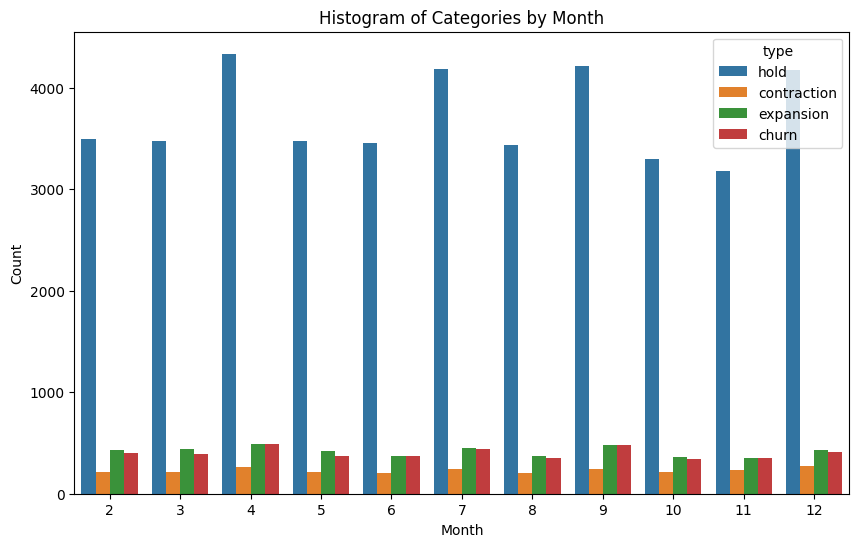

In [29]:
# For all months combinly both years
# For year 2022
df_new_2022 = df_new[df_new['year']==2022]

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='type', data=df_new_2022)

# Customize the plot (optional)
plt.title("Histogram of Categories by Month")
plt.xlabel("Month")
plt.ylabel("Count")

plt.show()


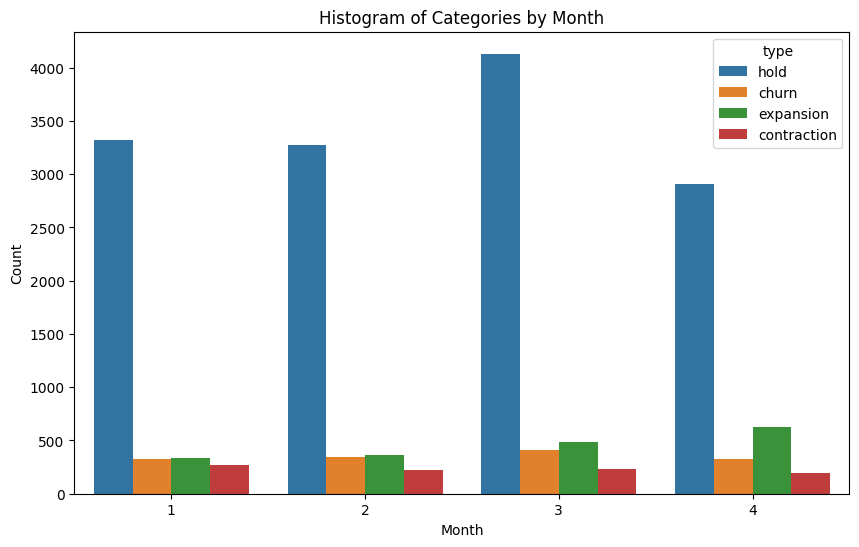

In [30]:
# For all months combinly both years
# For year 2023
df_new_2023 = df_new[df_new['year']==2023]

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='type', data=df_new_2023)

# Customize the plot (optional)
plt.title("Histogram of Categories by Month")
plt.xlabel("Month")
plt.ylabel("Count")

plt.show()

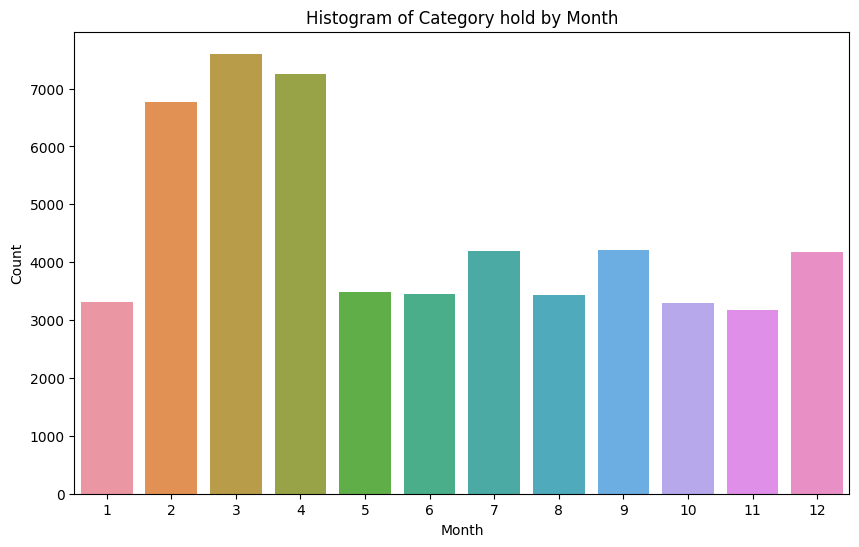

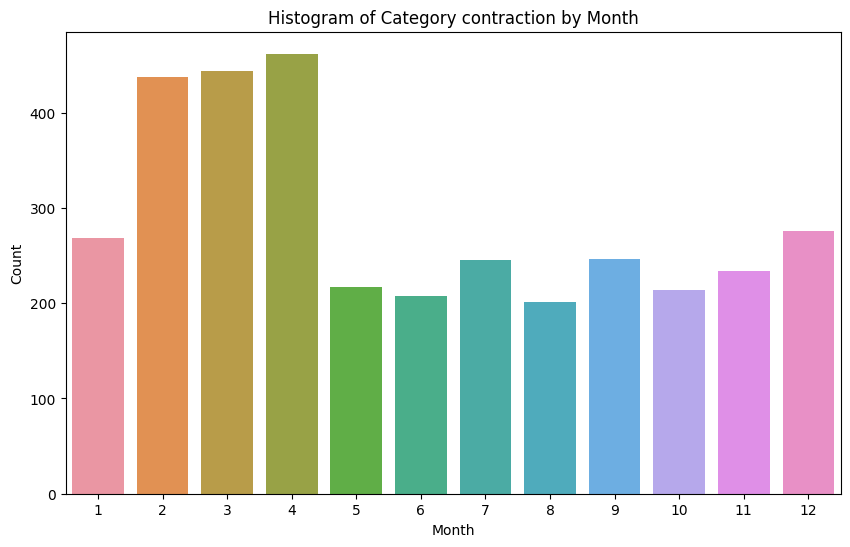

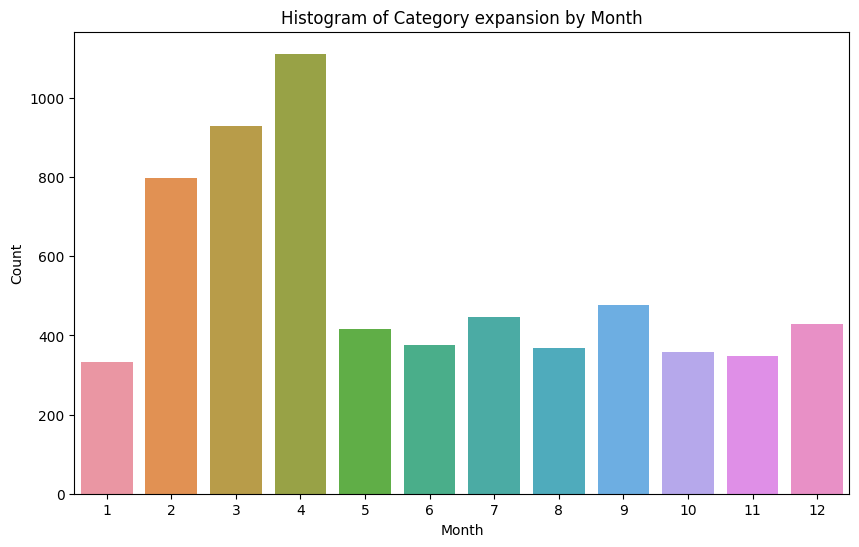

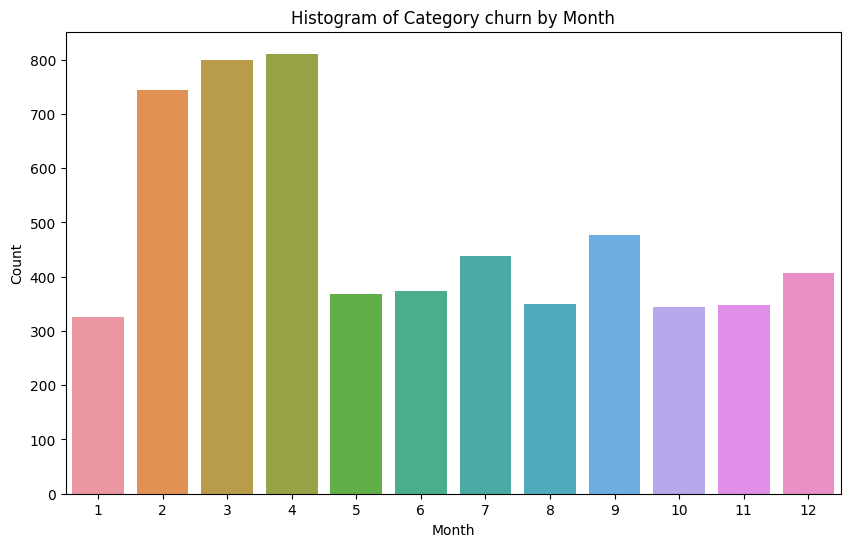

In [31]:
categories = df_new['type'].unique()

# Create a separate histogram for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='month', data=df_new[df_new['type'] == category])
    
    # Customize the plot (optional)
    plt.title(f"Histogram of Category {category} by Month")
    plt.xlabel("Month")
    plt.ylabel("Count")
    
    plt.show()


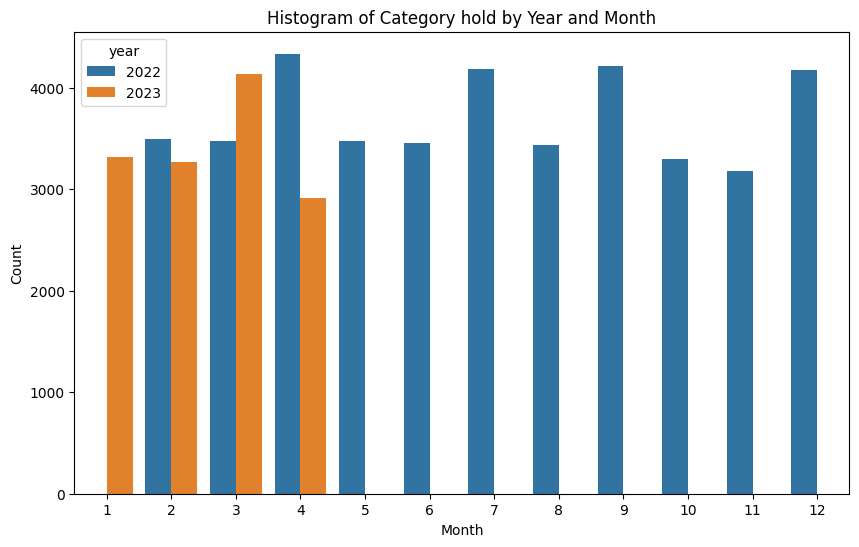

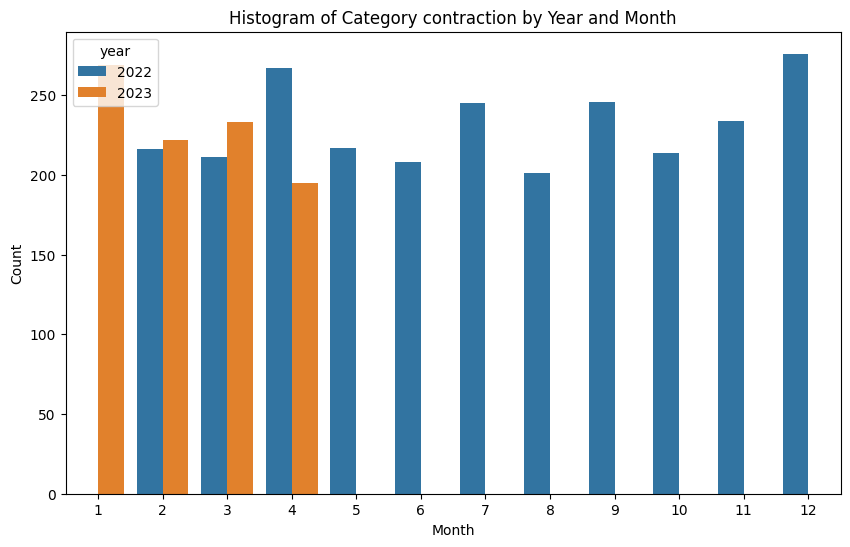

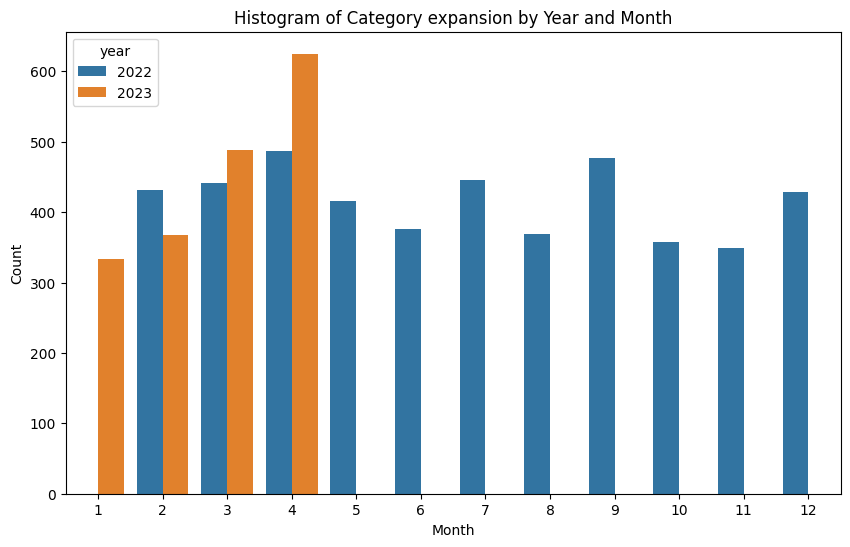

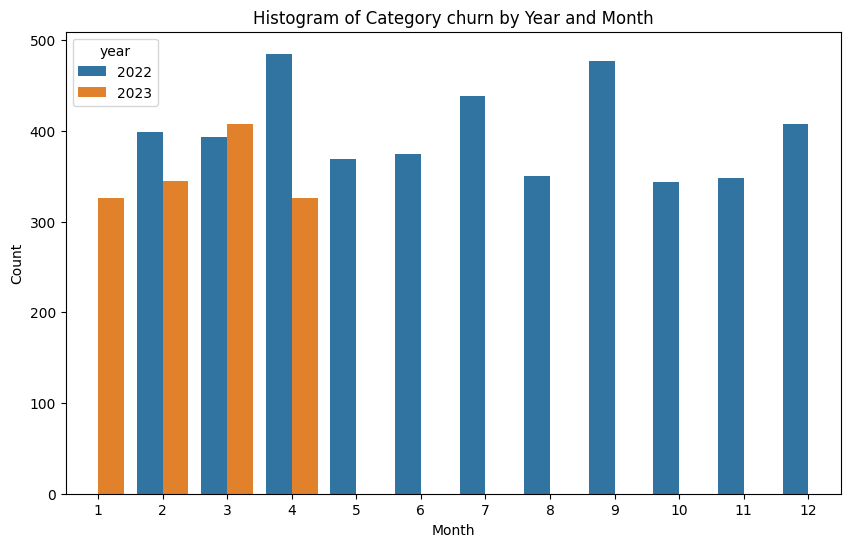

In [32]:
# Create a separate histogram for each category
categories = df_new['type'].unique()

for category in categories:
    # Filter the data for the current category
    filtered_data = df_new[df_new['type'] == category]
    
    # Group the filtered data by Year and Month
    grouped_data = filtered_data.groupby(['year', 'month']).size().reset_index(name='Count')
    
    # Create a new figure for the current category
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram for the current category
    sns.barplot(x='month', y='Count', hue='year', data=grouped_data)
    
    # Customize the plot (optional)
    plt.title(f"Histogram of Category {category} by Year and Month")
    plt.xlabel("Month")
    plt.ylabel("Count")
    
    plt.show()


In [35]:
group = df.groupby(['year','month'])['type']
group.value_counts()

year  month  type       
2022  2      hold           3494
             expansion       432
             churn           399
             contraction     216
      3      hold           3471
             expansion       442
             churn           393
             contraction     211
      4      hold           4335
             expansion       487
             churn           485
             contraction     267
      5      hold           3480
             expansion       416
             churn           369
             contraction     217
      6      hold           3457
             expansion       376
             churn           374
             contraction     208
      7      hold           4188
             expansion       446
             churn           438
             contraction     245
      8      hold           3435
             expansion       369
             churn           350
             contraction     201
      9      hold           4213
             churn

In [36]:
from datetime import datetime
date = datetime.strptime(df['score_date'][0], "%Y-%m-%d")
date.year

2022

In [48]:
df_eleg_90days = df[['eligibility_90_days','type']]
df_eleg_90days.head()

,eligibility_90_days,type
0,1,hold
1,1,hold
2,1,hold
3,1,hold
4,1,hold


In [50]:
df_eleg_90days.groupby(['type']).value_counts()

type         eligibility_90_days
churn        1                       5788
contraction  1                       3454
expansion    1                       6394
hold         1                      54364
Name: count, dtype: int64

In [51]:
df_eleg_90days['eligibility_90_days'].unique()

array([1], dtype=int64)

In [70]:
df.columns

Index(['id', 'score_date', 'arr_diff_outcome', 'eligibility_90_days', 'type',
       'max_tickets_per_agent', 'new_tickets', 'num_actions_ratio',
       'num_comments_ratio', 'new_tickets_ratio', 'solved_tickets_ratio',
       'max_agents', 'legacy_flag', 'paid_chat', 'team_plus',
       'max_agents_ratio', 'months_since_last_downsell', 'suite_flag',
       'paid_talk', 'total_arr_ratio', 'num_automations_ratio',
       'recent_kb_articles', 'num_views_ratio', 'num_user_fields',
       'num_ticket_forms', 'app_installs_ratio', 'num_orgs_ratio',
       'num_total_tags_ratio', 'no_hc_last_6M', 'num_macros', 'csat_enabled',
       'new_total_searches', 'num_app_installs', 'num_triggers_ratio',
       'num_automations', 'total_hc_views', 'custom_ticket_fields_ratio',
       'num_total_tags', 'num_views', 'num_ticket_forms_ratio', 'new_kb_views',
       'num_macros_ratio', 'new_kb_views_ratio', 'targets_engaged',
       'ticket_forms_engaged', 'automations_engaged',
       'num_custom_ticke

In [60]:
cols = df.columns.tolist()
cols

['id',
 'score_date',
 'arr_diff_outcome',
 'eligibility_90_days',
 'type',
 'max_tickets_per_agent',
 'new_tickets',
 'num_actions_ratio',
 'num_comments_ratio',
 'new_tickets_ratio',
 'solved_tickets_ratio',
 'max_agents',
 'legacy_flag',
 'paid_chat',
 'team_plus',
 'max_agents_ratio',
 'months_since_last_downsell',
 'suite_flag',
 'paid_talk',
 'total_arr_ratio',
 'num_automations_ratio',
 'recent_kb_articles',
 'num_views_ratio',
 'num_user_fields',
 'num_ticket_forms',
 'app_installs_ratio',
 'num_orgs_ratio',
 'num_total_tags_ratio',
 'no_hc_last_6M',
 'num_macros',
 'csat_enabled',
 'new_total_searches',
 'num_app_installs',
 'num_triggers_ratio',
 'num_automations',
 'total_hc_views',
 'custom_ticket_fields_ratio',
 'num_total_tags',
 'num_views',
 'num_ticket_forms_ratio',
 'new_kb_views',
 'num_macros_ratio',
 'new_kb_views_ratio',
 'targets_engaged',
 'ticket_forms_engaged',
 'automations_engaged',
 'num_custom_ticket_fields',
 'num_triggers',
 'end_user_csat',
 'triggers_e

In [61]:
for i in cols:
    if i[:2]=='is':
        print(i)

is_reply_time_above_benchmark
is_resolution_time_above_benchmark
is_end_user_csat_response_rate_above_benchmark
is_end_user_csat_above_benchmark
is_csat_above_benchmark


In [69]:
desc[desc['Missing Values']>0]

,Rows,Missing Values,Data Types,Duplicate Row,Mean,Median,std_dev
Column Names,,,,,,,
months_since_last_downsell,70000,39372,float64,0,N/A,N/A,N/A
end_user_csat,70000,58992,float64,0,N/A,N/A,N/A
months_since_high_sev_outage,70000,10983,float64,0,N/A,N/A,N/A
z2_median_reply_time_mins,70000,63629,float64,0,N/A,N/A,N/A
z2_median_resolution_time_mins,70000,62985,float64,0,N/A,N/A,N/A
agent_productivity,70000,23143,float64,0,N/A,N/A,N/A
self_service_ratio,70000,17969,float64,0,N/A,N/A,N/A


In [74]:
#Only churn dataset
df_churn = df[df['type']=='churn']
df_churn.shape

(5788, 76)

In [75]:
desc_churn = pd.DataFrame({'Column Names':df_churn.columns}).set_index('Column Names')
desc_churn['Rows'] = df_churn.shape[0]
desc_churn['Missing Values'] = df_churn.isnull().sum()
desc_churn['Data Types'] = df_churn.dtypes
desc_churn['Duplicate Row'] = len(df_churn)-len(df_churn.drop_duplicates())
desc_churn['Mean'] = [df_churn[i].sum()/df_churn.shape[0] if df_churn[i].dtype == ('int64' or 'float64') else 'N/A' for i in df_churn.columns]
desc_churn['Median'] = [df_churn[i].median() if df_churn[i].dtype == ('int64' or 'float64') else 'N/A' for i in df_churn.columns]
desc_churn['std_dev'] = [df_churn[i].std() if df_churn[i].dtype == ('int64' or 'float64') else 'N/A' for i in df_churn.columns]
desc_churn.head(25)

,Rows,Missing Values,Data Types,Duplicate Row,Mean,Median,std_dev
Column Names,,,,,,,
id,5788,0,object,0,N/A,N/A,N/A
score_date,5788,0,object,0,N/A,N/A,N/A
arr_diff_outcome,5788,0,float64,0,N/A,N/A,N/A
eligibility_90_days,5788,0,int64,0,1.0,1.0,0.0
type,5788,0,object,0,N/A,N/A,N/A
max_tickets_per_agent,5788,0,int64,0,311.194368,0.0,9812.713155
new_tickets,5788,0,int64,0,488.408258,1.0,4458.05024
num_actions_ratio,5788,0,float64,0,N/A,N/A,N/A
num_comments_ratio,5788,0,float64,0,N/A,N/A,N/A


In [76]:
desc_churn[desc_churn['Missing Values']>0]

,Rows,Missing Values,Data Types,Duplicate Row,Mean,Median,std_dev
Column Names,,,,,,,
months_since_last_downsell,5788,3749,float64,0,N/A,N/A,N/A
end_user_csat,5788,5302,float64,0,N/A,N/A,N/A
months_since_high_sev_outage,5788,838,float64,0,N/A,N/A,N/A
z2_median_reply_time_mins,5788,5344,float64,0,N/A,N/A,N/A
z2_median_resolution_time_mins,5788,5271,float64,0,N/A,N/A,N/A
agent_productivity,5788,3647,float64,0,N/A,N/A,N/A
self_service_ratio,5788,2729,float64,0,N/A,N/A,N/A


In [93]:
df_churn['end_user_csat'].value_counts()

end_user_csat
0.000000    70
1.000000    62
0.600000     7
0.500000     6
0.800000     5
            ..
0.893758     1
0.881048     1
0.884444     1
0.967213     1
0.801012     1
Name: count, Length: 318, dtype: int64